In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import ks_2samp
from scipy.stats import gaussian_kde
import my_functions_notebook as mf
import my_functions_for_plots as mf_plots

In [2]:
#In case we need to reload  functions

#import importlib
#importlib.reload(mf)
#importlib.reload(mf_plots)

In [3]:
## HIGHER AREAS! 20 SESSIONS! 
## my_areas = ['VISl', 'VISal', 'VISam', 'VISpm']

In [4]:
#LIST OF VARIABLES AS IN THE DATA FORMAT
#mean_NC_ACTIVE, mean_SC_ACTIVE, mean_NC_PASSIVE, mean_SC_PASSIVE, is_orthogonal_matrix,  determinant_rot_matrix, pearson_ACTIVE, pearson_PASSIVE, p_value_ACTIVE, p_value_PASSIVE

In [5]:
# Step 1: Import data from the text file into NumPy arrays
data = np.loadtxt("../local_code/signal_noise_corr_comparison_HIGHER_AREAS.txt", delimiter=' ')  # Use the appropriate delimiter

mean_NC_ATIVE = data[:,0]
mean_NC_PASSIVE = data[:,2]

mean_SC_ATIVE = data[:,1]
mean_SC_PASSIVE = data[:,3]

signal_noise_corr_ACTIVE = data[:,6]
signal_noise_corr_PASSIVE = data[:,7]

p_values_ACTIVE = data[:,8]
p_values_PASSIVE = data[:,9]

is_orthogonal_matrix = data[:,4]
determinant_rotation_matrix = data[:,5]

KS Statistic: 0.3000
KS Test p-value (permutations): 0.3317
Significance Level (alpha): 0.0500
There is no significant difference between the two datasets.


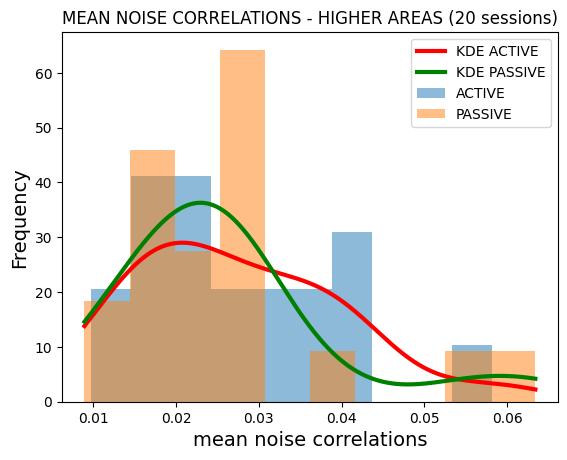

In [6]:
#MEAN NOISE CORRELATIONS (MAGNITUDE): COMPARISON
xlabel_NC = 'mean noise correlations'
title_NC = 'MEAN NOISE CORRELATIONS - HIGHER AREAS (20 sessions)'
n_bins_NC = 10
mf_plots.plot_and_test_histograms(mean_NC_ATIVE, mean_NC_PASSIVE, n_bins_NC, 1000, 0.05, xlabel_NC, title_NC)

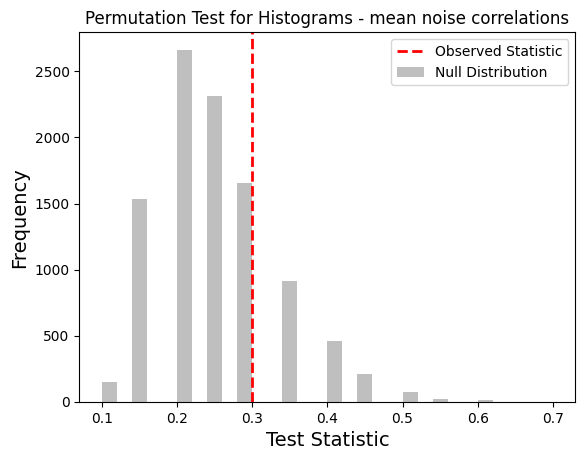

p-value: 0.3339


(0.33386661333866613, False)

In [7]:
mf_plots.permutation_test_histograms(mean_NC_ATIVE, mean_NC_PASSIVE, 10000, 0.05, 'Permutation Test for Histograms - mean noise correlations')

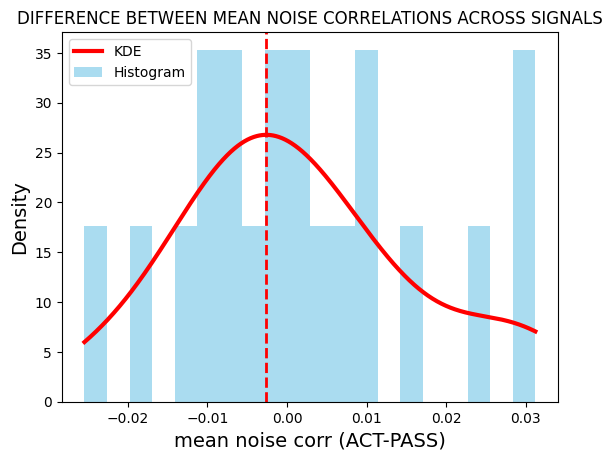

In [8]:
#PAIRWISE TO CONFIRM RESULT
NC_diff = mean_NC_ATIVE - mean_NC_PASSIVE

mf_plots.fit_and_plot_histogram(NC_diff, xlabel='mean noise corr (ACT-PASS)', title='DIFFERENCE BETWEEN MEAN NOISE CORRELATIONS ACROSS SIGNALS', num_bins=20)

KS Statistic: 0.4500
KS Test p-value (permutations): 0.0390
Significance Level (alpha): 0.0500
The two datasets are statistically different.


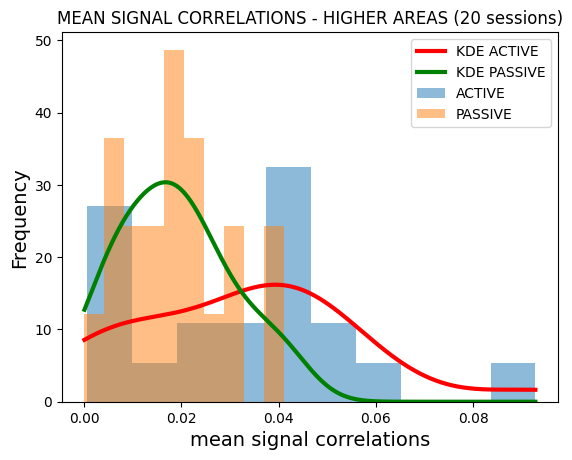

In [9]:
#SIGNAL CORRELATIONS

xlabel_SC = 'mean signal correlations'
title_SC = 'MEAN SIGNAL CORRELATIONS - HIGHER AREAS (20 sessions)'
n_bins_SC = 10
mf_plots.plot_and_test_histograms(mean_SC_ATIVE, mean_SC_PASSIVE, n_bins_SC, 1000, 0.05, xlabel_SC, title_SC, False, True, 'Mean_signal_corr_HIGHER_20_sess.png')

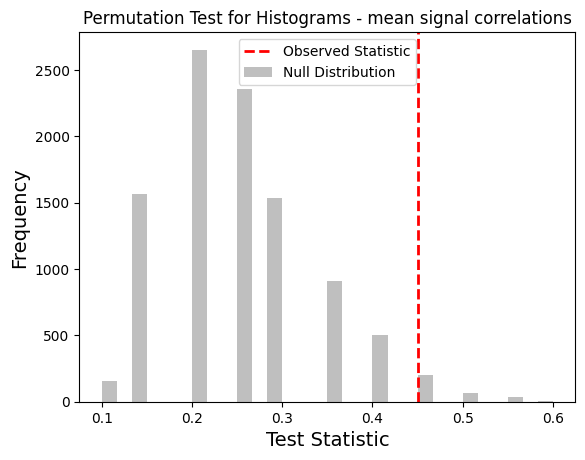

p-value: 0.0319


(0.03189681031896811, True)

In [10]:
mf_plots.permutation_test_histograms(mean_SC_ATIVE, mean_SC_PASSIVE, 10000, 0.05, 'Permutation Test for Histograms - mean signal correlations')

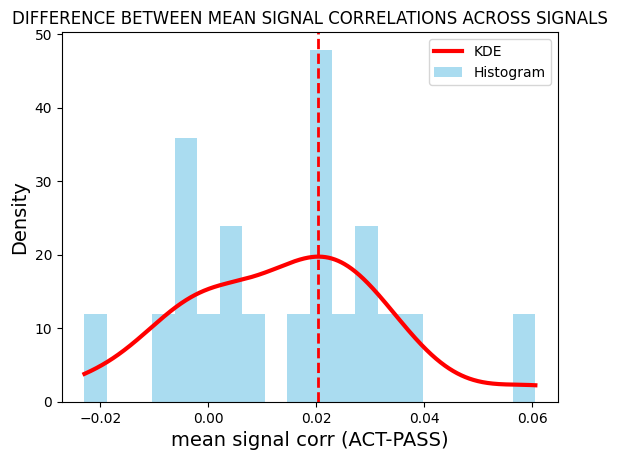

In [11]:
#PAIRWISE TO CONFIRM RESULT
SC_diff = mean_SC_ATIVE - mean_SC_PASSIVE

mf_plots.fit_and_plot_histogram(SC_diff, xlabel='mean signal corr (ACT-PASS)', title='DIFFERENCE BETWEEN MEAN SIGNAL CORRELATIONS ACROSS SIGNALS', num_bins=20)

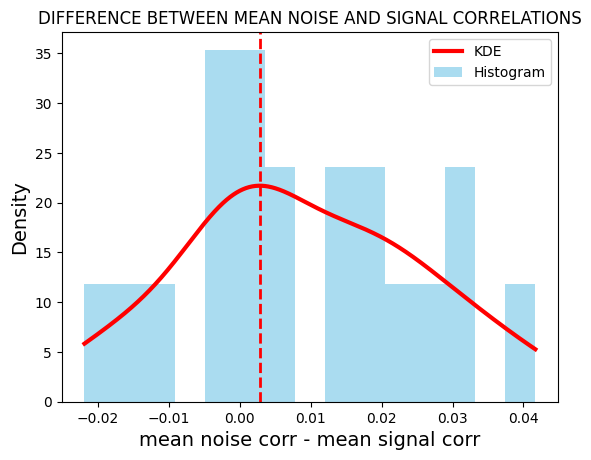

In [12]:
#DIFFERENCE BETWEEN MEAN NOISE CORRELATIONS AND SIGNAL CORRELATIONS (IN EACH SESSION, BETWEEN ACTIVE AND PASSIVE)
NC_SC_difference = mean_NC_ATIVE - mean_SC_PASSIVE
mf_plots.fit_and_plot_histogram(NC_SC_difference, xlabel='mean noise corr - mean signal corr', title='DIFFERENCE BETWEEN MEAN NOISE AND SIGNAL CORRELATIONS', num_bins=15)

In [13]:
print('no clear modulation of noise and signal correlations strength')

no clear modulation of noise and signal correlations strength


In [14]:
# CORRELATIONS BETWEEN NOISE AND SIGNAL CORRELATIONS

KS Statistic: 0.3500
KS Test p-value (permutations): 0.1848
Significance Level (alpha): 0.0500
There is no significant difference between the two datasets.


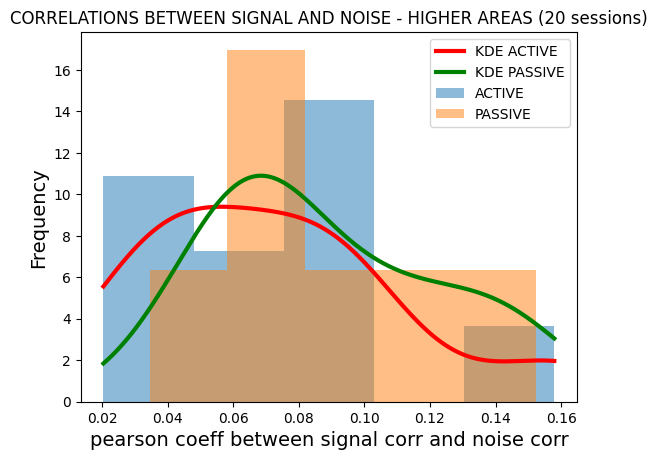

In [15]:
xlabel_PEARS = 'pearson coeff between signal corr and noise corr'
title_PEARS = 'CORRELATIONS BETWEEN SIGNAL AND NOISE - HIGHER AREAS (20 sessions)'
n_bins_PEARS = 5
mf_plots.plot_and_test_histograms(signal_noise_corr_ACTIVE, signal_noise_corr_PASSIVE, n_bins_PEARS, 1000, 0.05, xlabel_PEARS, title_PEARS)

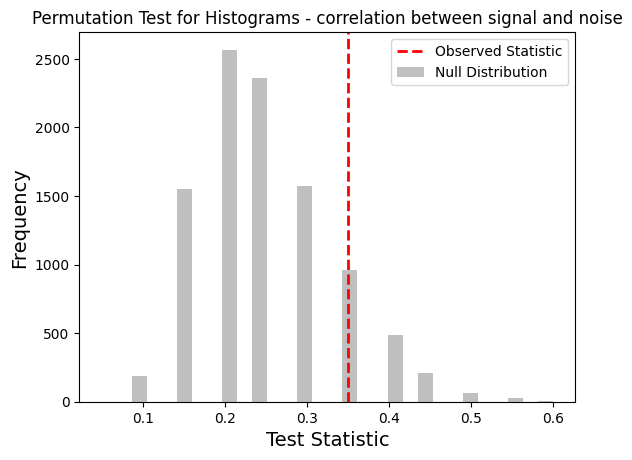

p-value: 0.1763


(0.17628237176282371, False)

In [16]:
mf_plots.permutation_test_histograms(signal_noise_corr_ACTIVE, signal_noise_corr_PASSIVE, 10000, 0.05, 'Permutation Test for Histograms - correlation between signal and noise')

In [19]:
import importlib
importlib.reload(mf_plots)

<module 'my_functions_for_plots' from '/root/capsule/local_notebooks/my_functions_for_plots.py'>

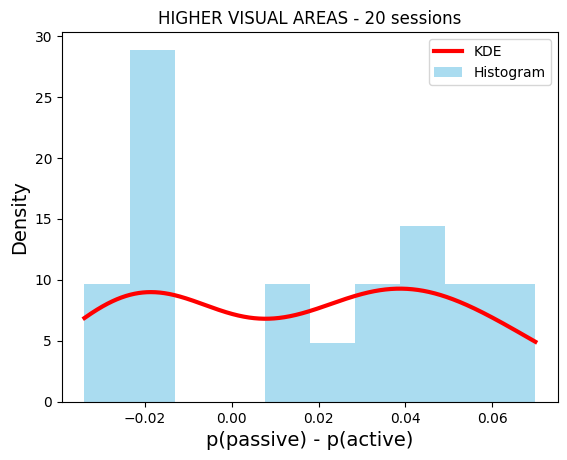

In [20]:
#DIFFERENCE BETWEEN PEARSON COEFFICIENTS (IN EACH SESSION, BETWEEN ACTIVE AND PASSIVE)
PEARS_difference = signal_noise_corr_PASSIVE - signal_noise_corr_ACTIVE 
mf_plots.fit_and_plot_histogram(PEARS_difference, 'p(passive) - p(active)','HIGHER VISUAL AREAS - 20 sessions', 10, 0.5, True, 'Noise_Signal_correlations_DIFFERENCE_HIGHER_20_sessions.png')